## Subquest 02 

### 1. VGG16 Model 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')



In [2]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [3]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [5]:
####  parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
# Training data generator with data augmentation 
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [13]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
# Validation data generator with augmentation (only scaling)
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


#### 1-1. VGG16 model 구현하기

In [20]:
# VGG16 model
input_layer=tf.keras.layers.Input((256,256,3))
x=tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x)

model=tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 128)       0   

In [22]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [23]:
# model training
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 35s 273ms/step - loss: 4220407.5000 - binary_accuracy: 0.5000 - val_loss: 0.6976 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 34s 269ms/step - loss: 0.7030 - binary_accuracy: 0.5000 - val_loss: 0.6999 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 33s 266ms/step - loss: 0.6997 - binary_accuracy: 0.5000 - val_loss: 0.6944 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 33s 266ms/step - loss: 0.6938 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 34s 268ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000


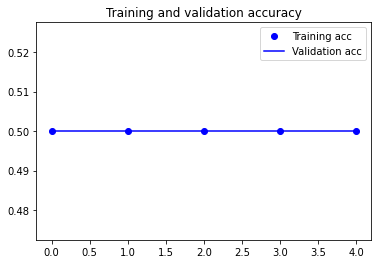

In [24]:
# 시각화
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 1-2 새로운 모델 만들기 (성능올리기)
- epoch 5->10 으로 증가
- learning rate 0.01 -> 0.001 으로 감소
- batch normalization 함수 사용

In [39]:
####  parameter 재설정
batch_size = 16
epochs = 50  # 5->10 으로 증가 
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [32]:
# Training data generator with data augmentation 
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.5,
                                     width_shift_range=0.3,
                                     height_shift_range=0.3,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [33]:
# Validation data generator with augmentation (only scaling)
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
# NEW VGG16 model with batch normalization and skip connection 
input_layer=tf.keras.layers.Input((256,256,3))
x=tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x)

model=tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 128, 128, 128)     1475

In [41]:
#### learning rate 줄이기
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [36]:
# model training
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
125/125 [==============================] - 39s 303ms/step - loss: 3.9001 - binary_accuracy: 0.5000 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 38s 306ms/step - loss: 0.7354 - binary_accuracy: 0.5000 - val_loss: 0.7189 - val_binary_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 39s 307ms/step - loss: 0.7153 - binary_accuracy: 0.5000 - val_loss: 0.6976 - val_binary_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 38s 305ms/step - loss: 0.6907 - binary_accuracy: 0.5000 - val_loss: 0.6808 - val_binary_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 38s 303ms/step - loss: 0.6891 - binary_accuracy: 0.5000 - val_loss: 0.7250 - val_binary_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 38s 306ms/step - loss: 0.6783 - binary_accuracy: 0.5000 - val_loss: 0.6732 - val_binary_accuracy: 0.5000
Epoch 7/10
125/125 [==========================

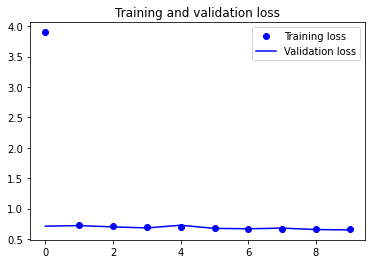

In [37]:
# 시각화
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2. Object Detection

In [9]:
!python -m venv tutorial-env
!source tutorial-env/bin/activate

In [12]:
!pip3 install tensorflow-estimator==2.6.0

# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [14]:
# 이미지 조절 관련 함수 

def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin
    
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmpffv1pl14.jpg.


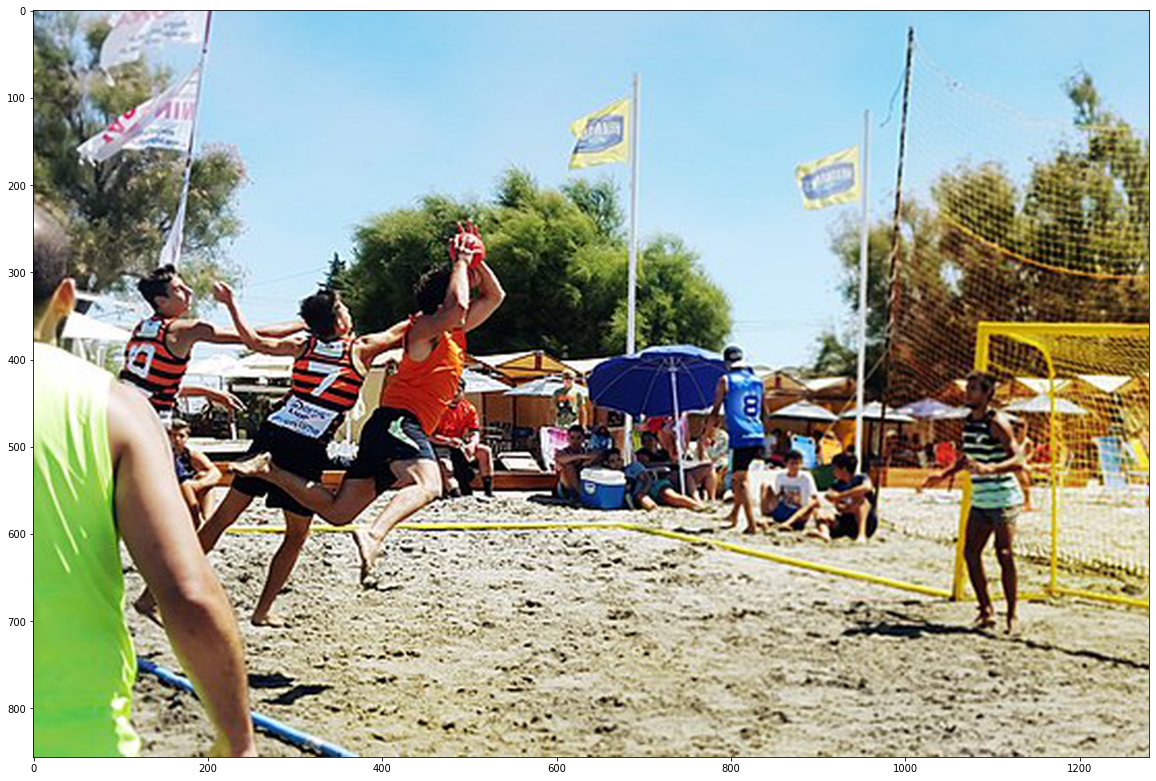

In [15]:
# 이미지 불러오기
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [16]:
# Pretrained InceptionResnet model 을 사용한 Faster RCNN model 
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [17]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [18]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

#### 2-1. 다른 이미지로 테스트해보기 

In [31]:
# 이미지 불러오기
image_url = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb559Ya%2FbtqDGH3Kehn%2FjBgIDOSkHxunTdzpTQ7qS0%2Fimg.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1024, 1024, True)  # new_width와 new_height를 변경해 보세요.

Image downloaded to /tmp/tmp5twwiyaz.jpg.


Found 100 objects.
Inference time:  74.57317757606506


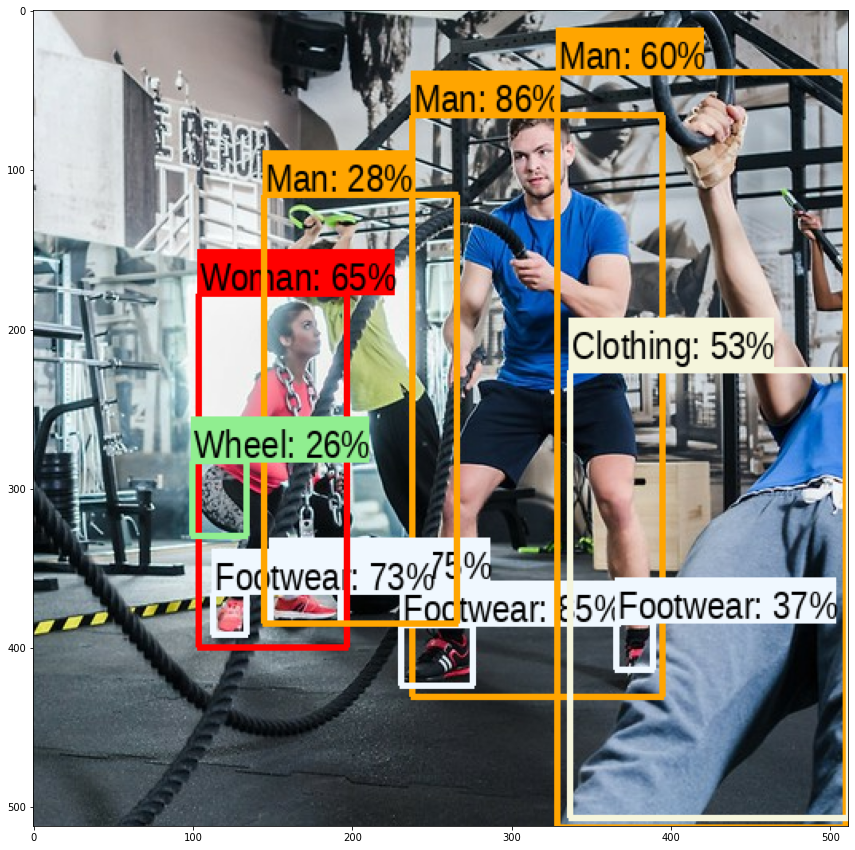

In [22]:
run_detector(detector, downloaded_image_path)

#### 2-2. 다양한 pretrained model test 해보기 

In [29]:
# 모델 불러오기 
import tensorflow_hub as hub
module_handle="https://www.kaggle.com/models/tensorflow/mask-rcnn-inception-resnet-v2/TensorFlow2/1024x1024/1"
detector=hub.load(module_handle).signatures['default'] 

KeyError: 'default'

In [32]:
# 모델 테스트 
run_detector(detector, downloaded_image_path)

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[[0.9176471  0.9215687  0.94117653]
   [0.9215687  0.92549026 0.9450981 ]
   [0.9176471  0.9294118  0.9490197 ]
   ...
   [0.29411766 0.3019608  0.29803923]
   [0.3137255  0.32156864 0.30980393]
   [0.31764707 0.3254902  0.3137255 ]]

  [[0.9215687  0.92549026 0.9450981 ]
   [0.9215687  0.92549026 0.9450981 ]
   [0.9176471  0.9294118  0.9490197 ]
   ...
   [0.29411766 0.3019608  0.2901961 ]
   [0.3137255  0.32156864 0.30980393]
   [0.31764707 0.3254902  0.3137255 ]]

  [[0.91372555 0.92549026 0.9450981 ]
   [0.91372555 0.92549026 0.9450981 ]
   [0.91372555 0.92549026 0.9450981 ]
   ...
   [0.2901961  0.29803923 0.28627452]
   [0.31764707 0.3254902  0.3137255 ]
   [0.32941177 0.3372549  0.31764707]]

  ...

  [[0.27058825 0.30980393 0.34509805]
   [0.29803923 0.3372549  0.37254903]
   [0.30980393 0.34901962 0.38431376]
   ...
   [0.42352945 0.54901963 0.64705884]
   [0.45098042 0.5764706  0.6745098 ]
   [0.47450984 0.6        0.69803923]]

  [[0.27450982 0.3137255  0.34901962]
   [0.28627452 0.3254902  0.36078432]
   [0.2901961  0.32941177 0.3647059 ]
   ...
   [0.43137258 0.5568628  0.654902  ]
   [0.45098042 0.5764706  0.6745098 ]
   [0.4666667  0.5921569  0.6901961 ]]

  [[0.26666668 0.30588236 0.34117648]
   [0.25882354 0.29803923 0.33333334]
   [0.25882354 0.29803923 0.33333334]
   ...
   [0.44705886 0.57254905 0.67058825]
   [0.46274513 0.5882353  0.6862745 ]
   [0.4666667  0.5921569  0.6901961 ]]]], shape=(1, 1024, 1024, 3), dtype=float32))
  input_signature: (
    TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name=None))

In [ ]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 resnet ")